In [1]:
import sys
import numpy as np
sys.path.insert(0, "../..")
import scirpy as ir
import scanpy as sc
from glob import glob
import pandas as pd
import tarfile
import anndata
import warnings
from matplotlib import pyplot as plt
from numba import NumbaPerformanceWarning

# ignore numba performance warnings
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

# suppress "storing XXX as categorical" warnings.
anndata.logging.anndata_logger.setLevel("ERROR")

In [2]:
data_sets =['289_Pri','290_Pri','295','296_Pri_CD8pos','305_1_Pri','307_Pri','309_Pri','310','314','316',
                '290_LN2','291_Pri','296_Pri_CD8neg','304_Pri','305_2_Pri','307_sLN','309_sLN','313','315']

In [3]:
combined = sc.read('/scratch/combined_umap_annotated.h5ad')

## QC for TCR data by sample

In [4]:
## look at NKT and B cell markers for 307_sLN B:CD19,CD20 NKT:CD56
## confirm tcr on umap clustering
## making points transparent
## put all samples together and see whether cells have tcr data cluster

## get cell identity of the cells that have tcr but do not express t-cell genes

For 289_Pri


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


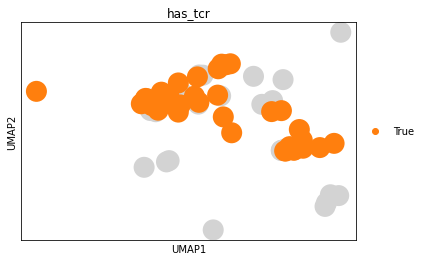

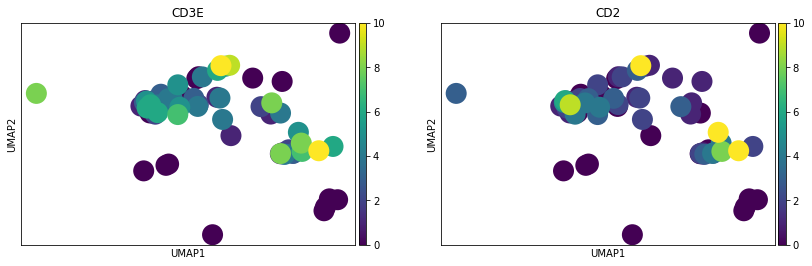

For 290_Pri


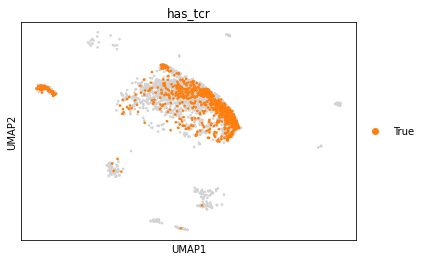

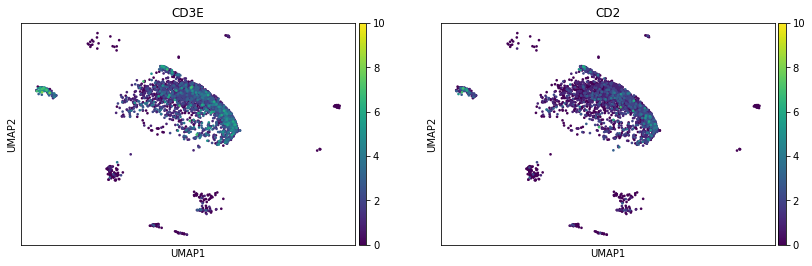

For 295


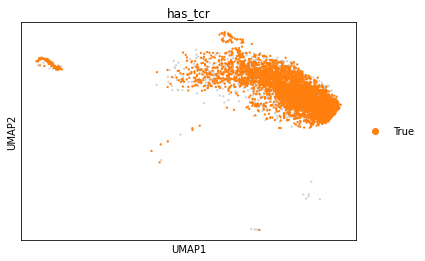

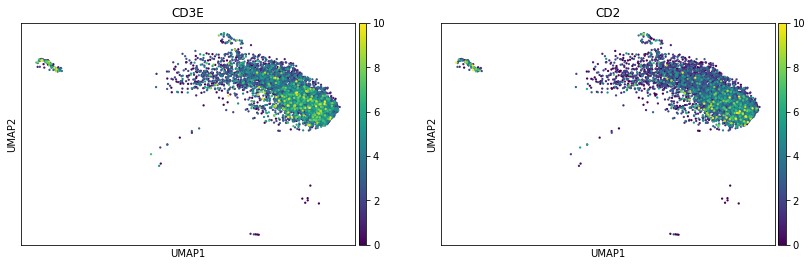

For 296_Pri_CD8pos


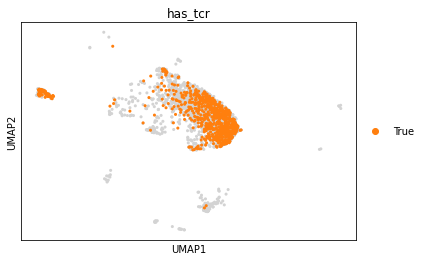

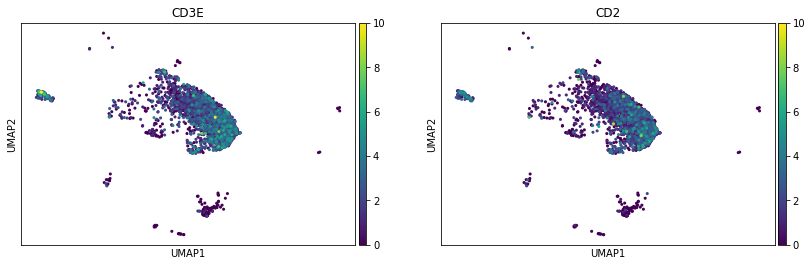

For 305_1_Pri


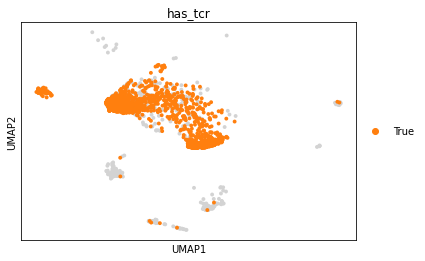

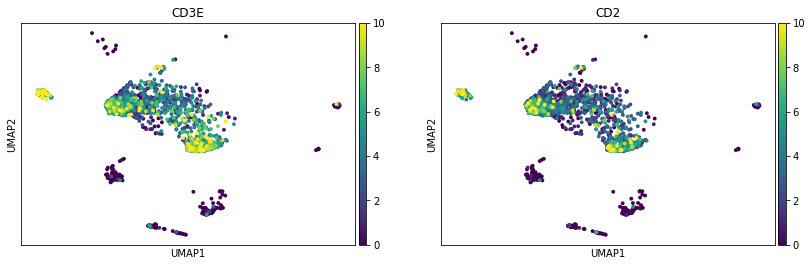

For 307_Pri


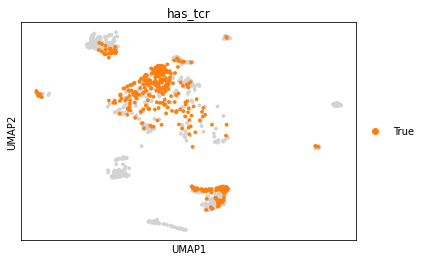

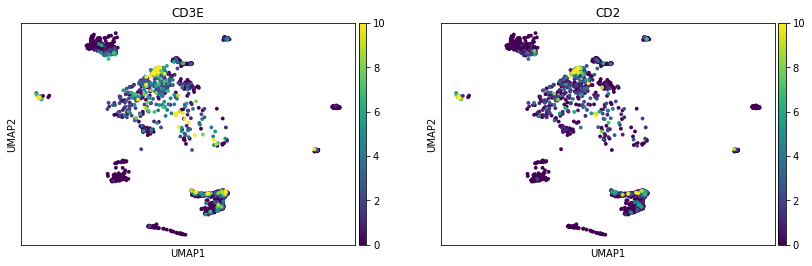

For 309_Pri


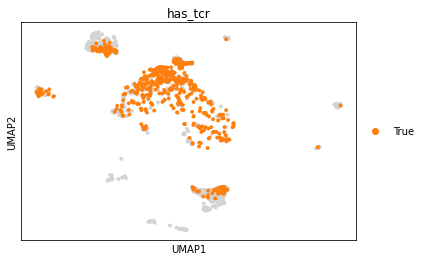

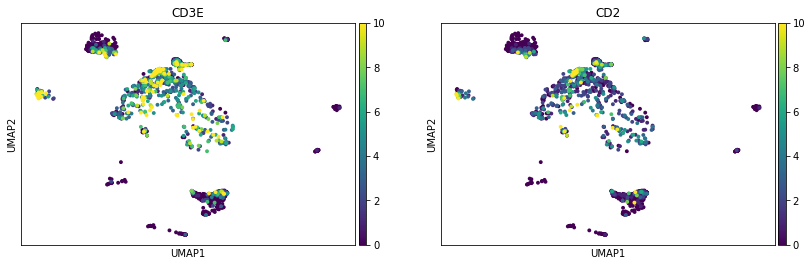

For 310


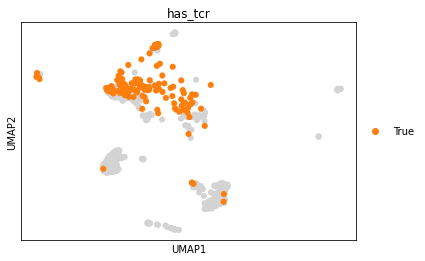

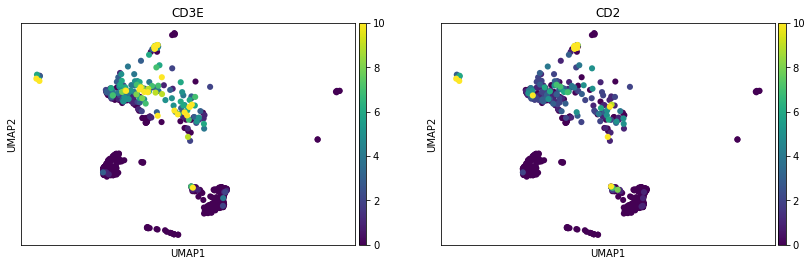

For 314


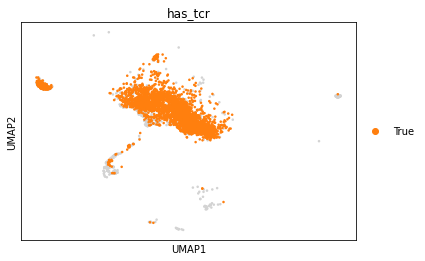

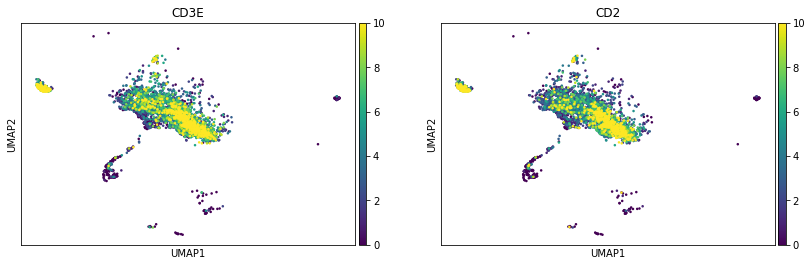

For 316


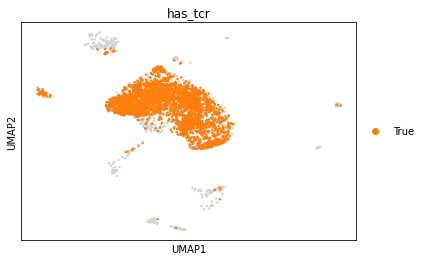

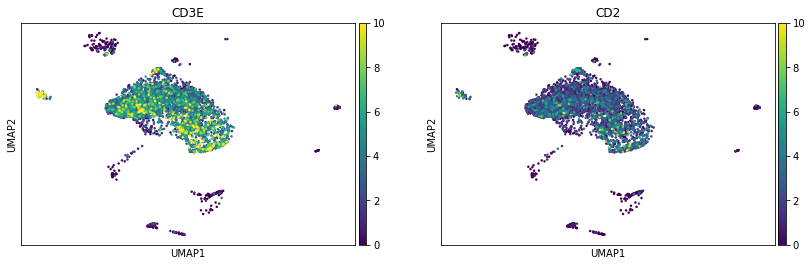

For 290_LN2


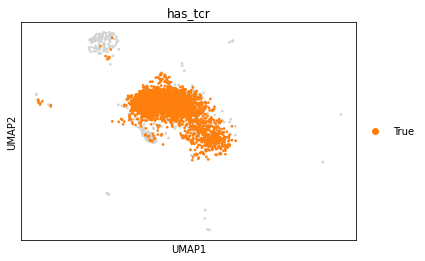

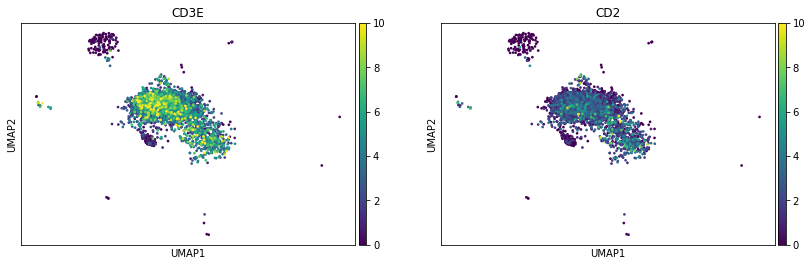

For 291_Pri


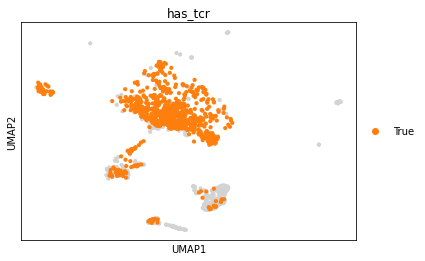

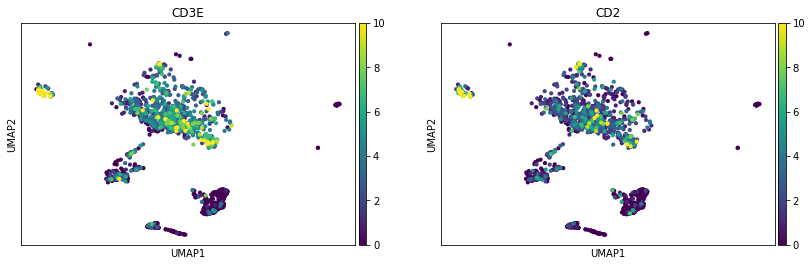

For 296_Pri_CD8neg


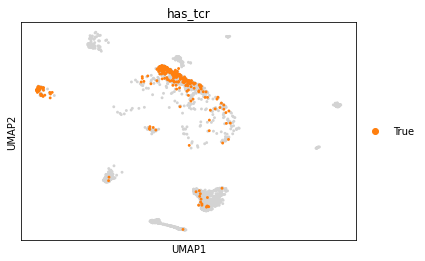

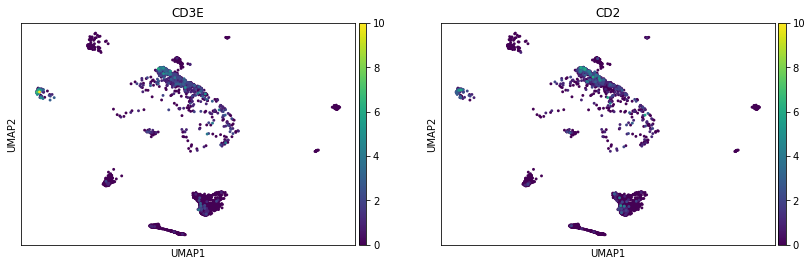

For 304_Pri


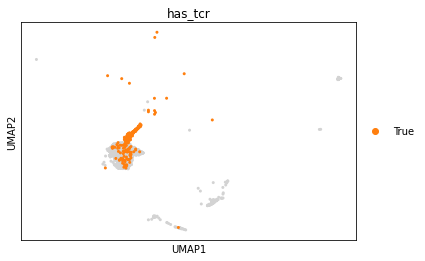

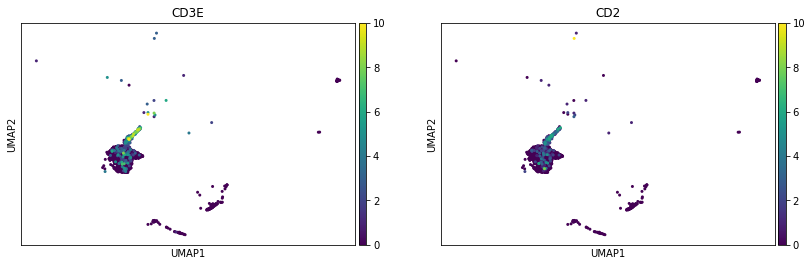

For 305_2_Pri


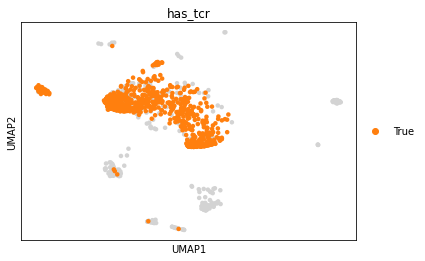

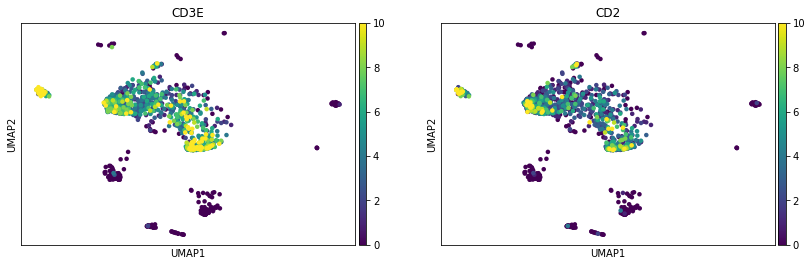

For 307_sLN


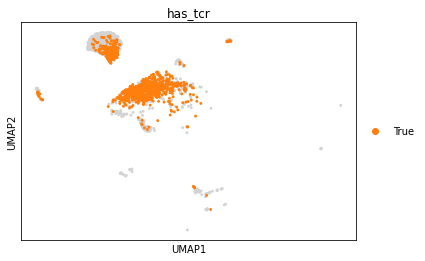

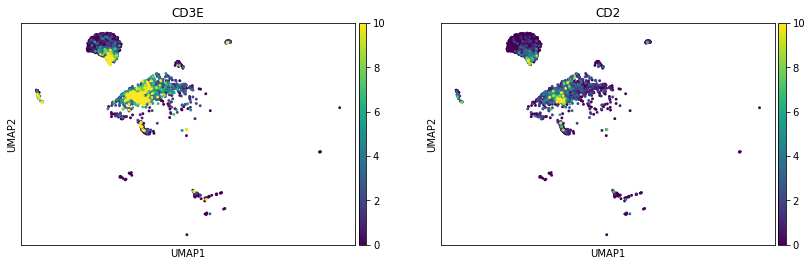

For 309_sLN


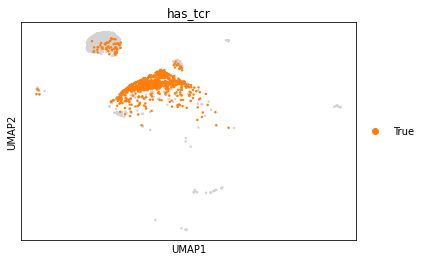

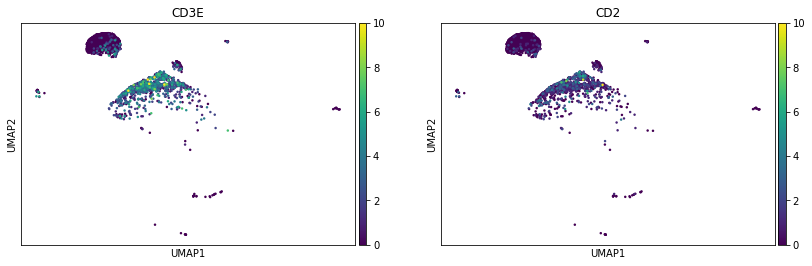

For 313


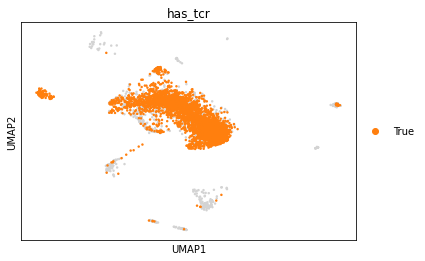

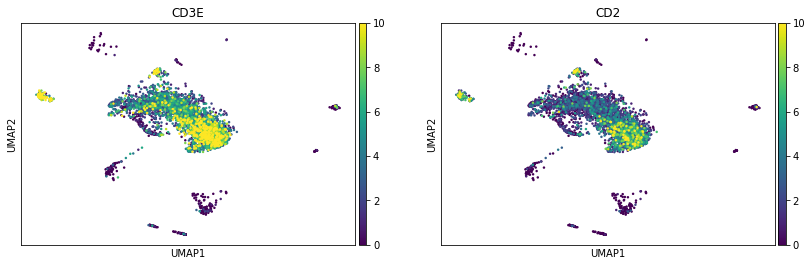

For 315


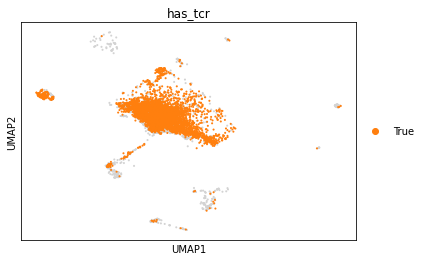

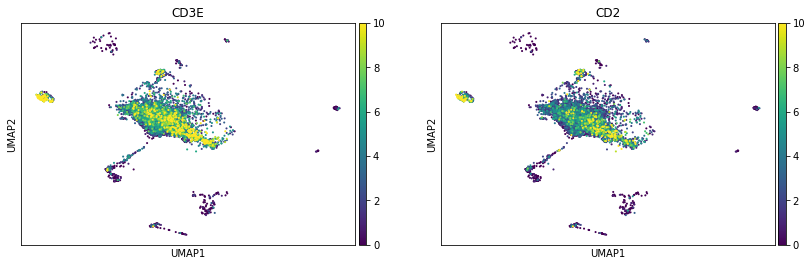

In [4]:
for data_set in data_sets:
    print('For '+data_set)
    sc.pl.umap(combined[combined.obs['sample']==data_set],color=['has_tcr'],groups='True')
    sc.pl.umap(combined[combined.obs['sample']==data_set],color=['CD3E','CD2'],vmax=10)

#### Most TCR data seems fine except for 307_sLN, where there is a chunk of cell (bottom-left) that doesn't have TCR data but express CD3E and CD2 and the cells that have TCR data actually have relatively low expression of CD3E and CD2. Since in the samples we have a lot of B cells and NK cells as well and some of those could also express certain T cell genes, we take a look at a few particular markers for B cells and NK cells for 307_sLN.

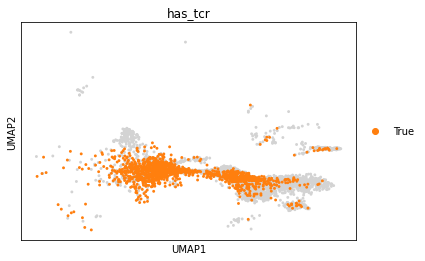

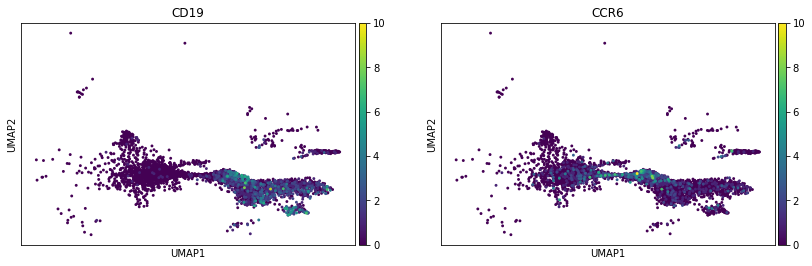

In [5]:
# Check for B-cell receptor gene CD19 and NK cell marker gene CCR6
sc.pl.umap(combined[combined.obs['sample']=='307_sLN'],color=['has_tcr'],groups='True')
sc.pl.umap(combined[combined.obs['sample']=='307_sLN'],color=['CD19','CCR6'],vmax=10)

## Examine overall clustering for cells that have TCR data and expression of T-cell marker genes

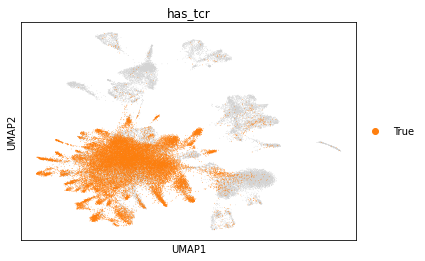

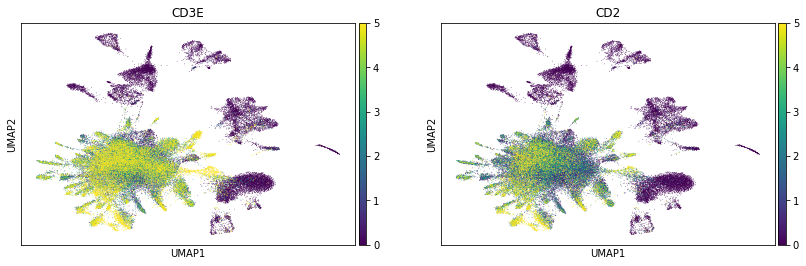

In [7]:
sc.pl.umap(combined, color=['has_tcr'],groups='True')
sc.pl.umap(combined, color=['CD3E','CD2'],vmax=5) # cap the expression level at 5 to increase visibility